# HW 2

In [215]:
# Initialization
library("faraway")
library("moments")
library("ellipse")

## Part A (Maximum 4 pages).

Using R, create a 10 ×3 matrix X:
$$\begin{aligned}\begin{bmatrix} 1 & 2 & -2 \\ 1 & -1 & -2 \\ 1 & 3 & -2 \\ 1 & 3 & 3 \\ 1 & 2 & 3 \\ 1 & 1 & 3 \\ 1 & 0 & 0 \\ 1 & 0 & 0 \\ 1 & -1 & 0 \\ 1 & 0 & 1 \end{bmatrix}\end{aligned}$$
Now create a $3\times1$ matrix $\beta$ whose entries are 1, -1, and 2. Next create a $10\times1$ matrix $\epsilon$ whose entries are IID (independent and identically distributed) standard normal (useful command: “rnorm”). Finally, set $Y = X\beta+\epsilon$.

In [216]:
# data initialization
X <- matrix(c(
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    2, -1, 3, 3, 2, 1, 0, 0, -1, 0,
    -2, -2, -2, 3, 3, 3, 0, 0, 0, 1
),
nrow = 10,
ncol = 3
)
beta <- matrix(c(1, -1, 2))
epsilon <- rnorm(10)
Y <- X %*% beta + epsilon

1. Calculate $(X^′X)^{−1}X^′Y$ to estimate β. What do you get? (Don’t use the “lm” command. Do the computation directly. You can use the “solve” command to compute a matrix inverse.)

In [217]:
beta_hat <- solve(t(X) %*% X) %*% t(X) %*% Y
beta_hat

0.2268988
-0.7717552
1.7678102


Here, $\hat{\beta}$ is very close to the original $\beta$.

2. Calculate the true variance of $\hat{\beta}$? (Remember that the variance of $\hat{\beta}$ is a $3\times3$ matrix.) (I say the “true” variance because, in this example,we know the true value of $\sigma^2$, and so don’t need to estimate it using the residuals.)

$Var(\hat{\beta})=\hat{\sigma}^2(X^TX)^{-1}$

In [218]:
sigma <- 1
var_beta_hat <- sigma^2 * solve(t(X) %*% X)
var_beta_hat

0.139180672,-0.042016807,-0.003413866
-0.042016807,0.050420168,-0.008403361
-0.003413866,-0.008403361,0.027442227


3. Use the residuals to estimate $\sigma^2$. What do you get?

$\displaystyle \hat{\sigma}^2 = \frac{\sum_i(y_i-\hat{y_i})^2}{n-(p+1)}$

In [219]:
delta <- Y - X %*% beta_hat
n <- dim(X)[1] # number of data
p <- dim(X)[2] - 1 # number of variables
estimated_var <- sum(delta^2) / (n - (p + 1))
estimated_var

[1] 1.517046

After many trials, I found that the result may sometimes be deviated from the actual value 1. However, in general the mean of different trials is very close to 1. This can be seen in question 5.

4. Now create a new $\epsilon$ and re-estimate $\beta$. Do this 1,000 times, and save all the answers in memory. Make a histogram of the 1,000 values of $\hat{\beta}_1$. Do the same for $\hat{\beta}_2$ and $\hat{\beta}_3$. Also calculate the sample variance for each of those three. Do your answers match with question 2?

In [220]:
beta_1_list <- c()
beta_2_list <- c()
beta_3_list <- c()

for (i in 1:1000) {
  epsilon <- rnorm(10)
  Y <- X %*% beta + epsilon
  beta_hat <- solve(t(X) %*% X) %*% t(X) %*% Y
  beta_1_list <- c(beta_1_list, beta_hat[1])
  beta_2_list <- c(beta_2_list, beta_hat[2])
  beta_3_list <- c(beta_3_list, beta_hat[3])
}

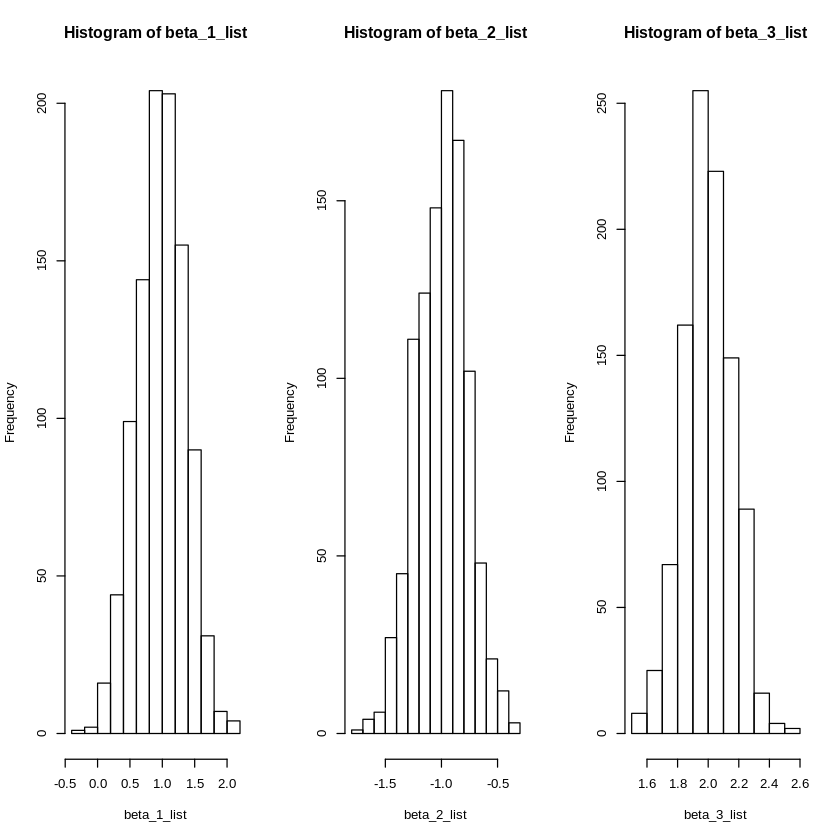

In [221]:
# Histograms for \hat{\beta}_1,\hat{\beta}_2 and \hat{\beta}_3
par(mfrow = c(1, 3), lwd = 1)
hist(beta_1_list)
hist(beta_2_list)
hist(beta_3_list)

In [222]:
# Sample Variances \hat{\beta}_1,\hat{\beta}_2 and \hat{\beta}_3
var(beta_1_list)
var(beta_2_list)
var(beta_3_list)
var_beta_hat

[1] 0.1424879

[1] 0.0493443

[1] 0.02542045

0.139180672,-0.042016807,-0.003413866
-0.042016807,0.050420168,-0.008403361
-0.003413866,-0.008403361,0.027442227


The calculated sample variances of $\hat{\beta}_1,\hat{\beta}_2$ and $\hat{\beta}_3$ are actually really close to the values in the diagonal of the variance matrix calculated in question 2.

5. Once again, re-create $\epsilon$ 1,000 times. Each time estimate $\sigma^2$. Make a histogram of your 1,000 values of $\hat{\sigma}^2$. Based on the histogram, does it look like $\hat{\sigma}^2$ provides a reliable estimate of $\sigma^2$? Why do you think so?

In [223]:
estimated_var_list <- c()
for (i in 1:1000) {
  # reset epsilon
  epsilon <- rnorm(10)
  # calculate Y and the corresponding beta_hat
  Y <- X %*% beta + epsilon
  beta_hat <- solve(t(X) %*% X) %*% t(X) %*% Y
  # estimate the sigma^2
  delta <- Y - X %*% beta_hat
  estimated_var <- sum(delta^2) / (n - (p + 1))
  estimated_var_list <- c(estimated_var_list, estimated_var)
}

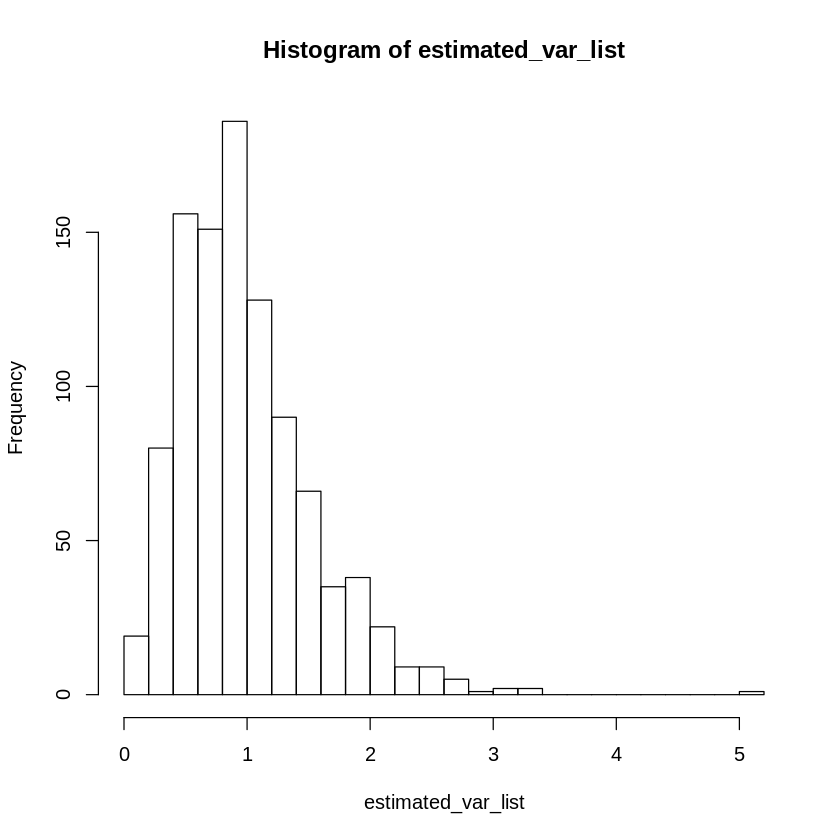

In [224]:
# Histogram for \hat{\sigma}^2
hist(estimated_var_list, breaks = 20)

In [225]:
mean(estimated_var_list)

[1] 0.990308

From the histogram we can see that estimated variances are highly distributed within $[0.5,1]$ and the distribution is right-skewed. However, by calculating the mean of these 1000 estimated variances we can see that the mean is really close to 1. Therefore, I think it still provides a reliable estimate.

6. Repeat (4) and (5), but instead of using normal distribution for $\epsilon$ use IID distribution with $P(\epsilon_i = 1) = 0.5$ and $P(\epsilon_i = −1) = 0.5$ which also has expectation 0 and variance 1 for each $\epsilon_i$. Do your answers change much?

In [226]:
# Re-initialize the lists for beta1/2/3 and estimated variance
beta_1_list <- c()
beta_2_list <- c()
beta_3_list <- c()
estimated_var_list <- c()

for (i in 1:1000) {
  # reset epsilon
  epsilon <- (rbinom(n = 10, size = 1, prob = 0.5) - 0.5) * 2
  # calculate Y and the corresponding beta_hat
  Y <- X %*% beta + epsilon
  beta_hat <- solve(t(X) %*% X) %*% t(X) %*% Y
  # estimate the sigma^2
  delta <- Y - X %*% beta_hat
  estimated_var <- sum(delta^2) / (n - (p + 1))

  beta_1_list <- c(beta_1_list, beta_hat[1])
  beta_2_list <- c(beta_2_list, beta_hat[2])
  beta_3_list <- c(beta_3_list, beta_hat[3])

  estimated_var_list <- c(estimated_var_list, estimated_var)
}

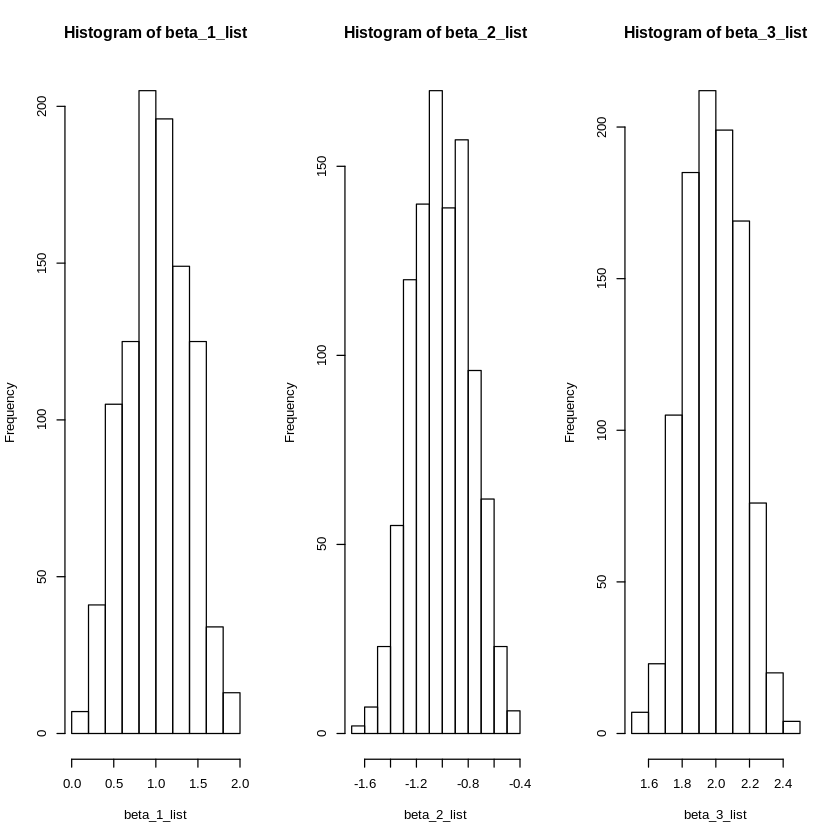

In [227]:
# Histograms for \hat{\beta}_1,\hat{\beta}_2 and \hat{\beta}_3
par(mfrow = c(1, 3), lwd = 1)
hist(beta_1_list)
hist(beta_2_list)
hist(beta_3_list)

In [228]:
# Sample Variance for \hat{\beta}_1,\hat{\beta}_2 and \hat{\beta}_3
var(beta_1_list)
var(beta_2_list)
var(beta_3_list)
var_beta_hat

[1] 0.1384768

[1] 0.04669226

[1] 0.02731616

0.139180672,-0.042016807,-0.003413866
-0.042016807,0.050420168,-0.008403361
-0.003413866,-0.008403361,0.027442227


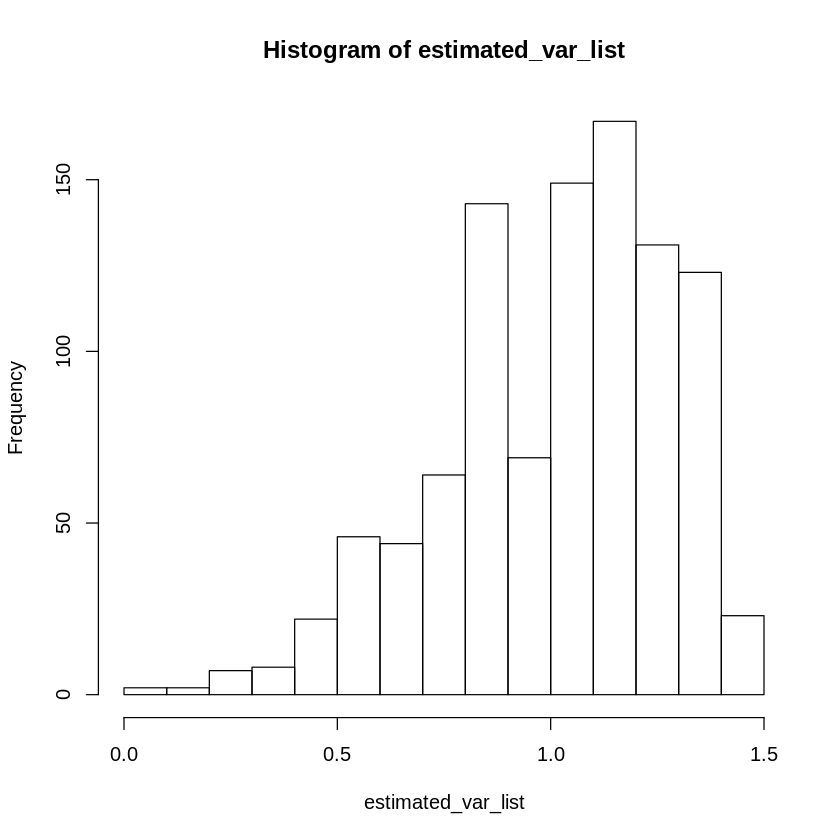

In [229]:
# Historgam for \hat{\sigma}^2
hist(estimated_var_list)

In [230]:
mean(estimated_var_list)

[1] 1.01586

Conclusion: We can see that the sample variances and distribution for $\hat{\beta}_1,\hat{\beta}_2$ and $\hat{\beta}_3$ here still match the answers in question 4. However, the distribution for estimating the variances does NOT match the distribution from question 4. The distribution here is left-skewed while the distribution in question 4 is right-skewed. Nevertheless, we can see that both means are very close to 1.



## Part B (Maximum 3 pages). 

In the punting data, we find the average distance punted and hang times of 10 punts of an American football as related to various measures of leg strength for 13 volunteers.

In [231]:
# data initialization
data(punting)
head(punting)

,Distance,Hang,RStr,LStr,RFlex,LFlex,OStr
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,162.50,4.75,170,170,106,106,240.57
2,144.00,4.07,140,130,92,93,195.49
3,147.50,4.04,180,170,93,78,152.99
4,163.50,4.18,160,160,103,93,197.09
5,192.00,4.35,170,150,104,93,266.56
6,171.75,4.16,150,150,101,87,260.56


1. Fit a regression model with Distance as the response and the right and left leg strengths and flexibilities as predictors. Which predictors
are significant at the $\alpha = 0.05$ level?

In [232]:
regre_model <- lm(Distance ~ RStr + LStr + RFlex + LFlex, data = punting)
summary(regre_model)


Call:
lm(formula = Distance ~ RStr + LStr + RFlex + LFlex, data = punting)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.941  -8.958  -4.441  13.523  17.016 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -79.6236    65.5935  -1.214    0.259
RStr          0.5116     0.4856   1.054    0.323
LStr         -0.1862     0.5130  -0.363    0.726
RFlex         2.3745     1.4374   1.652    0.137
LFlex        -0.5277     0.8255  -0.639    0.541

Residual standard error: 16.33 on 8 degrees of freedom
Multiple R-squared:  0.7365,	Adjusted R-squared:  0.6047 
F-statistic:  5.59 on 4 and 8 DF,  p-value: 0.01902


From the summary above we can see that the $p$-values for all variables are larger than 0.05. So we can conclude that NO predictors are significant at the $\alpha=0.05$ level.

2. Use an F-test to determine whether collectively these four predictors have a relationship to the response.

Firstly set up the $H_0$ and $H_A$ for the $F$-test:\
$H_0$: $\beta_{RStr}=\beta_{LStr}=\beta_{RFlex}=\beta_{LFlex}=0$\
$H_A$: At least 1 of them are not zero.

In [233]:
# model under H_0
h0 <- lm(Distance ~ 1, data = punting)

# model under H_0A
h0a <- lm(Distance ~ RStr + LStr + RFlex + LFlex, data = punting)

# compare two models
anova(h0, h0a)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12,8093.308,NA,NA,NA,NA
2,8,2132.641,4,5960.668,5.589941,0.01902482


We can see that the $p$-value here (0.01902482) is smaller than $\alpha=0.05$, so we can reject $H_0$. We can say that these four predictors might have relationships with the response.

3. Relative to the model in question 1, test whether the right and left leg strengths have the same effect.

Firstly set up the $H_0$ and $H_A$ for the $F$-test:\
$H_0$: $\beta_{RStr}=\beta_{LStr}$\
$H_A$: $\beta_{RStr}\ne \beta_{LStr}$

In [234]:
# model under H_0
h0 <- lm(Distance ~ I(RStr + LStr) + RFlex + LFlex, data = punting)

# model under H_0A
h0a <- lm(Distance ~ RStr + LStr + RFlex + LFlex, data = punting)

# compare two models
anova(h0, h0a)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,2287.356,NA,NA,NA,NA
2,8,2132.641,1,154.7151,0.5803702,0.4680292


The $p$-value here (0.4680292) is larger than $\alpha=0.05$. So we only can say that we do NOT have sufficient evidence to support that the right and left leg strengths have different effects.

4. Relative to the model in question 1, test whether the right and left leg flexibilities have the same effect.

Firstly set up the $H_0$ and $H_A$ for the $F$-test:\
$H_0$: $\beta_{RFlex}=\beta_{LFlex}$\
$H_A$: $\beta_{RFlex}\ne\beta_{LFlex}$

In [235]:
# model under H_0
h0 <- lm(Distance ~ RStr + LStr + I(RFlex + LFlex), data = punting)

# model under H_0A
h0a <- lm(Distance ~ RStr + LStr + RFlex + LFlex, data = punting)

# compare two models
anova(h0, h0a)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,2648.358,NA,NA,NA,NA
2,8,2132.641,1,515.7173,1.934568,0.2017235


The $p$-value here (0.2017235) is larger than $\alpha=0.05$. So we only can say that we do NOT have sufficient evidence to support that the right and left leg flexibilities have different effects.

5. Test for left-right symmetry by testing the hypotheses in question 3 and 4 simultaneously.

Firstly set up the $H_0$ and $H_A$ for the $F$-test:\
$H_0$: $\beta_{RStr}=\beta_{LStr}$ and $\beta_{RFlex}=\beta_{LFlex}$\
$H_A$: $\beta_{RStr}\ne\beta_{LStr}$ or $\beta_{RFlex}\ne\beta_{LFlex}$

In [236]:
# model under H_0
h0 <- lm(Distance ~ I(RStr + LStr) + I(RFlex + LFlex), data = punting)

# model under H_0A
h0a <- lm(Distance ~ RStr + LStr + RFlex + LFlex, data = punting)

# compare two models
anova(h0, h0a)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,2799.075,NA,NA,NA,NA
2,8,2132.641,2,666.4339,1.249969,0.3369868


The $p$-value here (0.3369868) is larger than $\alpha=0.05$. So we only can say that we do NOT have sufficient evidence to support that the left-right asymmetry.

6. Fit a model with Hang as the response and the same four predictors. Can we make a test to compare this model to that used in question 1? Explain

In [237]:
regre_hang_model <- lm(Hang ~ RStr + LStr + RFlex + LFlex, data = punting)
summary(regre_hang_model)


Call:
lm(formula = Hang ~ RStr + LStr + RFlex + LFlex, data = punting)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36297 -0.13528 -0.07849  0.09938  0.35893 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.225239   1.032784  -0.218    0.833
RStr         0.005153   0.007645   0.674    0.519
LStr         0.007697   0.008077   0.953    0.369
RFlex        0.019404   0.022631   0.857    0.416
LFlex        0.004614   0.012998   0.355    0.732

Residual standard error: 0.2571 on 8 degrees of freedom
Multiple R-squared:  0.8156,	Adjusted R-squared:  0.7235 
F-statistic: 8.848 on 4 and 8 DF,  p-value: 0.004925


From the summary we can see that these four predictors are also not significant because all $p$-values are larger than 0.05. Besides, I do NOT think we can make a F-test to compare two models. F-test is targeting at the linear models with different predictors (or different hypothesises). However, we have different response variables in these two models, that means each model is not “nested” in the other one. Therefore, we CANNOT make a F-test for comparison purpose.

## Part C (Maximum 3 pages).

Using the sat data (see help(sat) for the description of variables):

In [238]:
# data initialization
data(sat)
head(sat)

,expend,ratio,salary,takers,verbal,math,total
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Alabama,4.405,17.2,31.144,8,491,538,1029
Alaska,8.963,17.6,47.951,47,445,489,934
Arizona,4.778,19.3,32.175,27,448,496,944
Arkansas,4.459,17.1,28.934,6,482,523,1005
California,4.992,24.0,41.078,45,417,485,902
Colorado,5.443,18.4,34.571,29,462,518,980


1. Fit a linear regression model with total sat score as the response and takers, ratio and salary as predictors. Using this model, answer the questions 2-5:

In [239]:
sat_model <- lm(total ~ takers + ratio + salary, data = sat)
summary(sat_model)


Call:
lm(formula = total ~ takers + ratio + salary, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.244 -21.485  -0.798  17.685  68.262 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1057.8982    44.3287  23.865   <2e-16 ***
takers        -2.9134     0.2282 -12.764   <2e-16 ***
ratio         -4.6394     2.1215  -2.187   0.0339 *  
salary         2.5525     1.0045   2.541   0.0145 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.41 on 46 degrees of freedom
Multiple R-squared:  0.8239,	Adjusted R-squared:  0.8124 
F-statistic: 71.72 on 3 and 46 DF,  p-value: < 2.2e-16


2. Suppose you wish to claim that teachers’ salary has a positive effect on the SAT scores. State the appropriate null and alternative hypothesis, the test statistic, the $p$-value, and your conclusion at significance level $\alpha = 0.01$.

Firstly set up the $H_0$ and $H_A$ for the $F$-test:\
$H_0$: $\beta_{salary}\le0$\
$H_A$: $\beta_{salary}>0$\
Calculation from previous output: $\frac{\hat{\beta_{salary}}}{\hat{se}(\beta_{salary})}=\frac{2.5525}{1.0045}=2.5411$\
One-side test: $P(t_{46}\ge 2.5411)$

In [240]:
1 - pt(2.5411, df = 46)

[1] 0.007243625

Here, the $p$-value is 0.00724362487087671, which is smaller than $\alpha=0.01$. So we can reject $H_0$, and claim that teachers’ salary has a positive effect on the SAT scores.

3. Test the hypothesis $\beta_{takers} = \beta_{ratio} = \beta_{salary} = 0$. Explain in words what this hypothesis means.

Firstly set up the $H_0$ and $H_A$ for the $F$-test:\
$H_0$: $\beta_{takers}=\beta_{ratio}=\beta_{salary}=0$\
$H_A$: not $H_0$

In [241]:
# model under H_0
h0 <- lm(total ~ 1, data = sat)

# model under H_0A
h0a <- lm(total ~ takers + ratio + salary, data = sat)

# compare two models
anova(h0, h0a)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,49,274307.68,NA,NA,NA,NA
2,46,48315.37,3,225992.3,71.72077,2.262752e-17


The $p$-value here (2.262752e-17) is smaller than 0.05 (even much smaller than 0.01), so we can reject $H_0$. We can say that these three predictors might have relationships with the response. We can also say that at least one coefficient of three predictors is not zero.

4. Compute the 95% and 99% CIs for the parameter associated with salary. Using just these intervals, what can we deduce about the $p$-value for salary in the regression summary?

In [242]:
# 95% confidence
CI_salary_95 <- confint(sat_model, parm = c("salary"), level = 0.95)
CI_salary_95

# 99% confidence
CI_salary_99 <- confint(sat_model, parm = c("salary"), level = 0.99)
CI_salary_99

,2.5 %,97.5 %
salary,0.5304797,4.574461


,0.5 %,99.5 %
salary,-0.146684,5.251624


Confidence intervals are preferable to $p$-values, as they tell us the range of possible effect sizes compatible with the data. In general, if an observed result is statistically significant at a $p$-value of 0.05, then the null hypothesis should not fall within the 95% CI. So we can deduce that $p$-value for salary is larger than 0.01 but smaller than 0.05.

5. Compute and display a 95% joint confidence region for the parameters associated with ratio and salary. Add the origin to the plot. The location of the origin on the plot tells us the outcome of a certain hypothesis test. State that test and its outcome.

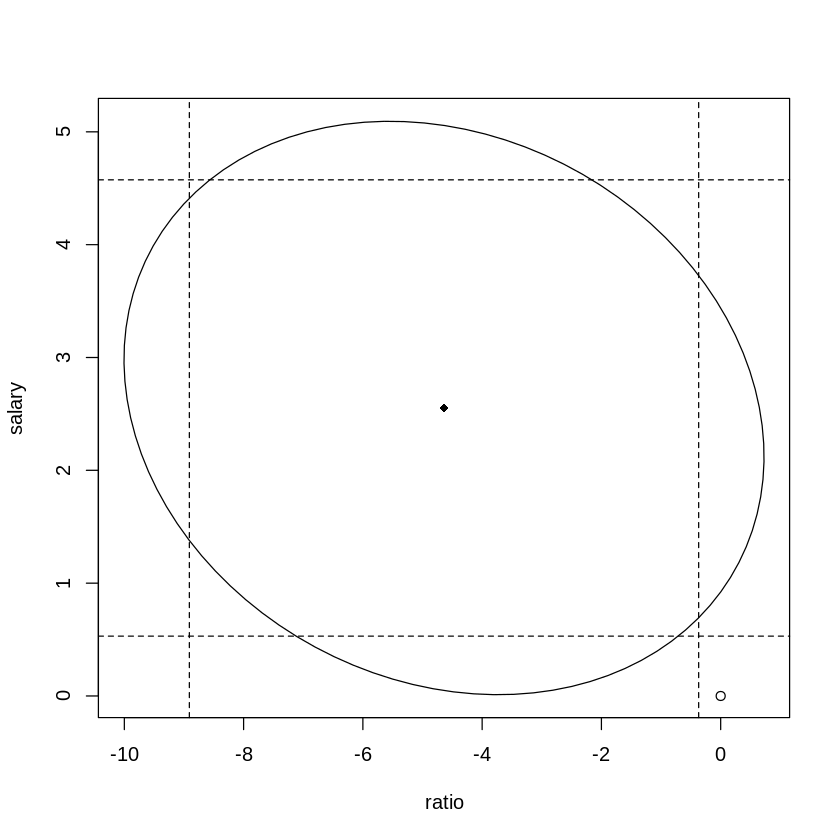

In [243]:
conf <- confint(sat_model, level = 0.95)

# Plot the confidence region
plot(ellipse(sat_model, c("ratio", "salary")), type = "l")

# Add the estimates to the plot
points(sat_model$coef["ratio"], sat_model$coef["salary"], pch = 18)

# Add the origin to the plot
points(0, 0, pch = 1)

# Add the confidence interval for ratio
abline(v = conf["ratio", ], lty = 2)

# Add the confidence interval for salary
abline(h = conf["salary", ], lty = 2)

$H_0$: $\beta_{ratio}=\beta_{salary}=0$\
$H_A$: not $H_0$\
From the plot above we can see that the original point is not in the confidence region ellipse. So we can reject $H_0$ and conclude that at least one coefficient of rate and salary is not zero

6. Now add expend (current expenditure per pupil) to the model and comment on the coefficients, their significance and the goodness of fit as compared to the model in question 1.

In [244]:
sat_modified_model <- lm(total ~ takers + ratio + salary + expend, data = sat)
summary(sat_model)
summary(sat_modified_model)


Call:
lm(formula = total ~ takers + ratio + salary, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.244 -21.485  -0.798  17.685  68.262 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1057.8982    44.3287  23.865   <2e-16 ***
takers        -2.9134     0.2282 -12.764   <2e-16 ***
ratio         -4.6394     2.1215  -2.187   0.0339 *  
salary         2.5525     1.0045   2.541   0.0145 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.41 on 46 degrees of freedom
Multiple R-squared:  0.8239,	Adjusted R-squared:  0.8124 
F-statistic: 71.72 on 3 and 46 DF,  p-value: < 2.2e-16



Call:
lm(formula = total ~ takers + ratio + salary + expend, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.531 -20.855  -1.746  15.979  66.571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1045.9715    52.8698  19.784  < 2e-16 ***
takers        -2.9045     0.2313 -12.559 2.61e-16 ***
ratio         -3.6242     3.2154  -1.127    0.266    
salary         1.6379     2.3872   0.686    0.496    
expend         4.4626    10.5465   0.423    0.674    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.7 on 45 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R-squared:  0.809 
F-statistic: 52.88 on 4 and 45 DF,  p-value: < 2.2e-16


From the summaries of two models above, we can see that all predictors from model in question 1 are significant at $\alpha=0.05$ because all $p$-values are smaller than 0.05; however, in the second model generated in this question, the $p$-values for ratio, salary and expend are all larger than $\alpha=0.05$, which means that they are all not significant. In such a sense, the former model in question 1 is a better fit for the data.

We can also use a F-test to compare the two models:\
$H_0$: $\beta_{expend}=0$\
$H_A$: $\beta_{expend}\ne0$

In [245]:
anova(sat_model, sat_modified_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46,48315.37,NA,NA,NA,NA
2,45,48123.90,1,191.4714,0.1790423,0.674213


Here, $p$-value is 0.674213 which is much larger than $\alpha=0.05$. So we cannot reject $H_0$. That means we do not have sufficient evidence to conclude that $\beta_{expend}\ne0$.

7. In the model of question 6, test the hypothesis $\beta_{salary} = \beta_{expend} =\beta_{ratio} = 0$. Based on your entire analysis, do you feel any of these predictors have an effect on the response?

$H_0$: $\beta_{salary}=\beta_{expend}=\beta_{ratio}=0$\
$H_A$: not $H_0$

In [246]:
# model under H_0
h0 <- lm(total ~ takers, data = sat)

# model under H_0A
h0a <- lm(total ~ takers + ratio + salary + expend, data = sat)

# compare two models
anova(h0, h0a)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,48,58433.15,NA,NA,NA,NA
2,45,48123.90,3,10309.25,3.213347,0.03164874


Here, $p$-value is 0.03164874 which is smaller than $\alpha=0.05$. So we can reject $H_0$ and say that at least one of the coefficient of ratio, salary and expend is not zero.

In [247]:
# Recall the summary of the new model
summary(sat_modified_model)


Call:
lm(formula = total ~ takers + ratio + salary + expend, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.531 -20.855  -1.746  15.979  66.571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1045.9715    52.8698  19.784  < 2e-16 ***
takers        -2.9045     0.2313 -12.559 2.61e-16 ***
ratio         -3.6242     3.2154  -1.127    0.266    
salary         1.6379     2.3872   0.686    0.496    
expend         4.4626    10.5465   0.423    0.674    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.7 on 45 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R-squared:  0.809 
F-statistic: 52.88 on 4 and 45 DF,  p-value: < 2.2e-16


From the summary we can see that the only $p$-value smaller than $\alpha=0.05$ is associated with the predictor “takers”. So we can only say that the predictor “takers” have an effect on response. As for the remaining predictors, all of their $p$-values are larger than 0.05, so we do not have sufficient evidence to say they have an effect on the response

## Part D (Maximum 2 pages). 

Using the teengamb data, fit a model with gamble as the response and the other variables as predictors.

In [248]:
data("teengamb")
head(teengamb)

,sex,status,income,verbal,gamble
,<int>,<int>,<dbl>,<int>,<dbl>
1,1,51,2.00,8,0.0
2,1,28,2.50,8,0.0
3,1,37,2.00,6,0.0
4,1,28,7.00,4,7.3
5,1,65,2.00,8,19.6
6,1,61,3.47,6,0.1


In [249]:
teen_model <- lm(gamble ~ sex + status + income + verbal, data = teengamb)
summary(teen_model)


Call:
lm(formula = gamble ~ sex + status + income + verbal, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.082 -11.320  -1.451   9.452  94.252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.55565   17.19680   1.312   0.1968    
sex         -22.11833    8.21111  -2.694   0.0101 *  
status        0.05223    0.28111   0.186   0.8535    
income        4.96198    1.02539   4.839 1.79e-05 ***
verbal       -2.95949    2.17215  -1.362   0.1803    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.69 on 42 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.4816 
F-statistic: 11.69 on 4 and 42 DF,  p-value: 1.815e-06


1. Predict the amount that a male with average (given these data) status, income and verbal score would gamble along with an appropriate 95% CI.

In [250]:
x1 <- data.frame(sex = 0, status = mean(teengamb$status), income = mean(teengamb$income), verbal = mean(teengamb$verbal))
predict(teen_model, x1, interval = "confidence", level = 0.95)

,fit,lwr,upr
1,28.24252,18.78277,37.70227


With an appropriate 95% CI, the upper result would be 37.70227 while the lower result would be 18.78277.

2. Repeat the prediction for a male with maximal values (for this data) of status, income and verbal score. Which CI is wider and why is this result expected?

In [251]:
x2 <- data.frame(sex = 0, status = max(teengamb$status), income = max(teengamb$income), verbal = max(teengamb$verbal))
predict(teen_model, x2, interval = "confidence", level = 0.95)

,fit,lwr,upr
1,71.30794,42.23237,100.3835


With an appropriate 95% CI, the upper result would be 100.3835 while the lower result would be 42.23237.\
Compared to CI in question 1, the second CI is obviously wider. For confidence intervals, we have CI:
$$\hat{y_0}\pm t_{n-(p+1)}^{(\alpha/2)} \hat{\sigma}\sqrt{X_0^T(X^TX)^{-1}x_0} $$
While the other terms remain stable, the only factor that matters is the term $\sqrt{X_0^T(X^TX)^{-1}x_0}$. If $x_0$ has larger values, the CI will be wider. In this question all predictors take the max values, that is why the CI here is much wider than the CI in question 1.

3. Fit a model with sqrt(gamble) as the response but with the same predictors. Now predict the response and give a 95% prediction interval for the individual in question 1. Take care to give your answer in the original units of the response.

In [252]:
teen_modified_model <- lm(sqrt(gamble) ~ sex + status + income + verbal, data = teengamb)
summary(teen_modified_model)


Call:
lm(formula = sqrt(gamble) ~ sex + status + income + verbal, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6606 -1.0961 -0.2564  0.9786  5.4178 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.97707    1.57947   1.885  0.06638 .  
sex         -2.04450    0.75416  -2.711  0.00968 ** 
status       0.03688    0.02582   1.428  0.16057    
income       0.47938    0.09418   5.090 7.94e-06 ***
verbal      -0.42360    0.19950  -2.123  0.03967 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.084 on 42 degrees of freedom
Multiple R-squared:  0.5646,	Adjusted R-squared:  0.5231 
F-statistic: 13.61 on 4 and 42 DF,  p-value: 3.362e-07


In [253]:
result <- predict(teen_modified_model, x1, interval = "confidence", level = 0.95)
result

,fit,lwr,upr
1,4.049523,3.180676,4.918371


In [254]:
# Original units of response
original_result <- c(result[1]^2, result[2]^2, result[3]^2)
original_result

[1] 16.39864 10.11670 24.19037

With an appropriate 95% CI, the fitted value would be 16.398640372701; the upper result would be 24.1903694265679 while the lower result would be 10.1167019967721.

4. Repeat the prediction for the model in question 3 for a female with status=20, income=1, verbal = 10.Comment on the credibility of the result.

In [255]:
x4 <- data.frame(sex = 1, status = 20, income = 1, verbal = 10)
predict(teen_modified_model, x4, interval = "confidence", level = 0.95)

,fit,lwr,upr
1,-2.08648,-4.445937,0.272978


The predicted data here is unreliable already because the fitted value as well as the lower bound are negative while $\sqrt{gamble}$ is obviously positive. So we can say that the prediction here is NOT reliable.